In [ ]:
from TNT_Api import TNT_Api
UN = TNT_Api(tag='聯合國',nlimit=10000)

In [ ]:
UN.get_data()

1377 documents found in tag 聯合國
downloading, 10000 to go
0 data downloaded
error: <class 'KeyboardInterrupt'>
100 data downloaded
error: <class 'KeyboardInterrupt'>
error: <class 'KeyboardInterrupt'>


In [ ]:
## Simple Cleaning and Spelling Correction
ocr = UN.ocr.copy().reset_index()
def replace_line_change(t):
    if len(t)>0: return t[0].replace('\n',' ')
    else: return None
ocr['ocr_text'] = ocr.ocr.map(replace_line_change,na_action='ignore')

In [ ]:
## Remove non-English
from langdetect import detect, DetectorFactory
from langdetect import detect_langs
DetectorFactory.seed =0 
def remove_non_eng(text):
    if detect(text)=='en':return text
    else: return None
ocr['ocr_eng'] = ocr.ocr_text.map(remove_non_eng,na_action='ignore')

In [ ]:
ocr = ocr.dropna(axis=0,how='any')

In [ ]:
ocr.to_csv('data/UN_raw.csv')

### Check Point

In [1]:
import enchant
import spelling_correction as sc
import numpy as np
import pandas as pd
ocr = pd.read_csv('data/UN_raw.csv')
chkr = enchant.Dict('en_US')

In [2]:
import numpy as np
test = ocr.ocr_eng.copy()
def check_mis_spell(text):
    mis_rate = np.sum([chkr.check(w) for w in sc.words(text)])/len(sc.words(text))
    return mis_rate
mis_rate = test.map(check_mis_spell,na_action='ignore')

In [3]:
mis_rate.describe()

count    1284.000000
mean        0.745149
std         0.129976
min         0.142857
25%         0.648372
50%         0.763583
75%         0.849270
max         1.000000
Name: ocr_eng, dtype: float64

In [4]:
text_length = test.map(len,na_action='ignore')
total_words = text_length.sum()
print ('There are total {:d} documents and {:d} words'.format(len(text_length),text_length.sum()))

There are total 1284 documents and 2199153 words


In [71]:
import time
def auto_correct(text):
    wordlist = []
    correct_dic = {}
    for w in sc.words(text):
        if chkr.check(w): wordlist.append(w)
        else: 
            c = sc.correction(w)
            print (w+"---->"+c)
            wordlist.append(c)
    return wordlist
start = time.time()
print ('Spelling Correction Sample')
subset = test.iloc[:5].map(auto_correct,na_action='ignore')
end = time.time()-start
print (end)

Spelling Correction Sample
activitis---->activities
por---->for
rgional---->regional
funetion---->function
vill---->vill
aselet---->asleep
reglonel---->regional
mediea1---->mediea1
orricer---->officer
aurvey---->survey
nureing---->nursing
heip---->help
allovlate---->alleviate
problons---->problems
pose1ble---->pose1ble
aust---->must
eoneernod---->eoneernod
prepent---->present
eitunt---->extent
eitustion---->situation
pereonnel---->personnel
oquipaent---->equipment
cnrra---->carry
progran---->program
eupplies---->supplies
becoso---->become
inetance---->instance
bospi---->bosom
pediatrie---->pediatrie
nuree---->nurse
treining---->training
hend---->hand
opd---->old
direetortbrina2d4ngeabahodnoatiog---->direetortbrina2d4ngeabahodnoatiog
twha---->the
eno---->no
basie---->base
euppltes---->supplies
noeded---->needed
renember---->remember
slways---->always
suffieient---->sufficient
s11---->s11
needa---->need
terna---->ten
nd---->nd
rer---->her
zse---->use
ceatre---->centre
wi1l---->wi1l
uneov

In [6]:
len(subset)

1284

### Check Point

In [12]:
collection = {}
for i in range(len(subset)):
    collection = {**collection,**subset[i][1]}

In [30]:
common = Counter(Counter(collection).values()).most_common()

### Visualization of The Most Common Misspelling Word

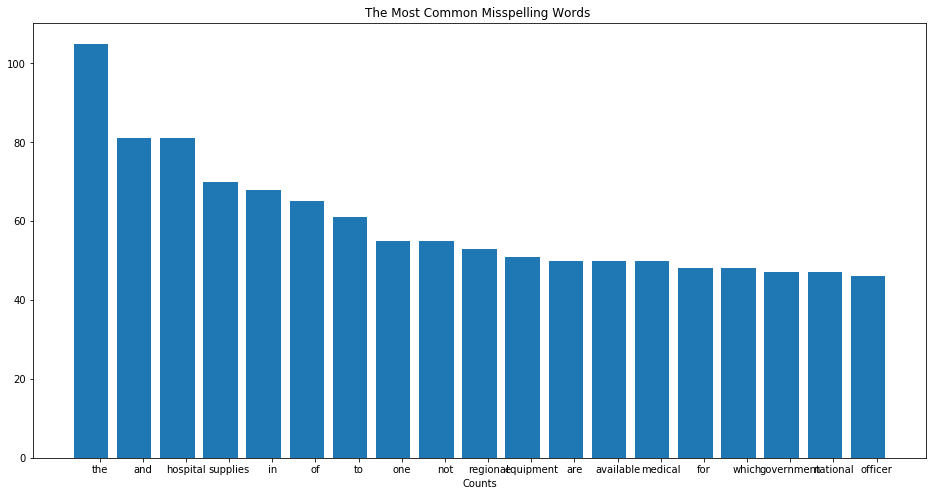

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
common[2:22]
labels, values = zip(*common[1:20])
indexes = np.arange(len(labels))


bar_width = 0.2
fig = plt.figure(figsize=(16,8))
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels)
plt.xlabel('Counts')
plt.title('The Most Common Misspelling Words ')
plt.show()

In [51]:
labels

array(['the', 'of', 'and', 'to', 'in', 'for', 'are', 'which', 'not',
       'supplies', 'one', 'hospital', 'medical', 'regional', 'equipment',
       'available', 'officer', 'government', 'national'],
      dtype='<U10')

In [44]:
uncorr = pd.read_csv('data/UN_raw.csv')
corr = pd.read_csv('data/UN_full_text.csv')

In [45]:
from spelling_correction import words
uncorrected_words = uncorr.ocr_eng.map(words,na_action='ignore').sum()
corrected_words = corr.ocr_eng.map(words,na_action='ignore').sum()

In [46]:
from collections import Counter
from nltk.corpus import stopwords
filtered_words1 = [word for word in uncorrected_words if word in labels]
filtered_words2 = [word for word in corrected_words if word in labels]

### Changes in Common Words Frequency After Correction

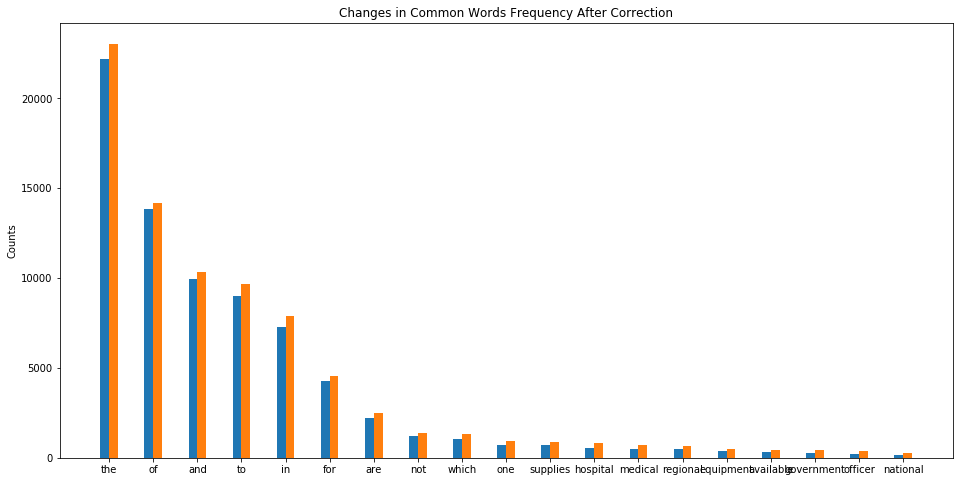

In [66]:
from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

counts1 = Counter(filtered_words1)
labels1, values1 = zip(*counts1.items())
indSort1 = np.argsort(values1)[:-20:-1]
labels1 = np.array(labels1)[indSort1]
values1 = np.array(values1)[indSort1]
indexes1 = np.arange(len(labels1))

counts2 = Counter(filtered_words2)
labels2, values2 = zip(*counts2.items())
indSort2 = np.argsort(values2)[:-20:-1]
labels2 = np.array(labels2)[indSort2]
values2 = np.array(values2)[indSort2]
indexes2 = np.arange(len(labels2))

bar_width = 0.1
w = 0.2
fig = plt.figure(figsize=(16,8))
plt.bar(indexes1, values1,width=0.2)
plt.bar(indexes2+0.2, values2,width=0.2)
plt.xticks(indexes1 + bar_width, labels1)
plt.title('Changes in Common Words Frequency After Correction')
plt.ylabel('Counts')
plt.show()